# Read and extend the SSP scenarios

## First load modules

In [1]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.lines as mlines

import pandas as pd

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
pd.__version__

'1.2.5'

## Download SSP scenario data from here:
https://tntcat.iiasa.ac.at/SspDb/download/iam_v2/SSP_IAM_V2_201811.csv.zip

## open scenario csv file as pandas dataframe

In [3]:
df = pd.read_csv("SSP_CMIP6_201811.csv")
df

MODEL            SCENARIO REGION  \
0              IMAGE             SSP1-19    BRA   
1              IMAGE             SSP1-19    BRA   
2              IMAGE             SSP1-19    BRA   
3              IMAGE             SSP1-19    BRA   
4              IMAGE             SSP1-19    BRA   
...              ...                 ...    ...   
21329  REMIND-MAGPIE  SSP5-85 (Baseline)  World   
21330  REMIND-MAGPIE  SSP5-85 (Baseline)  World   
21331  REMIND-MAGPIE  SSP5-85 (Baseline)  World   
21332  REMIND-MAGPIE  SSP5-85 (Baseline)  World   
21333  REMIND-MAGPIE  SSP5-85 (Baseline)  World   

                                                VARIABLE       UNIT  \
0                                     CMIP6 Emissions|BC   Mt BC/yr   
1          CMIP6 Emissions|BC|Agricultural Waste Burning   Mt BC/yr   
2                       CMIP6 Emissions|BC|Energy Sector   Mt BC/yr   
3                      CMIP6 Emissions|BC|Forest Burning   Mt BC/yr   
4                   CMIP6 Emissions|BC|Grassland Burning   Mt BC/yr   
...                                                  ...        ...   
21329                   CMIP6 Emissions|VOC|Peat Burning  Mt VOC/yr   
21330   CMIP6 Emissions|VOC|Residential Commercial Other  Mt VOC/yr   
21331  CMIP6 Emissions|VOC|Solvents Production and Ap...  Mt VOC/yr   
21332          CMIP6 Emissions|VOC|Transportation Sector  Mt VOC/yr   
21333                          CMIP6 Emissions|VOC|Waste  Mt VOC/yr   

            2015       2020       2030       2040       2050       2060  \
0       0.395043   0.312483   0.146233   0.205761   0.115044   0.110369   
1       0.007617   0.007928   0.009210   0.011483   0.011749   0.012350   
2       0.005504   0.004715   0.002788   0.001557   0.001023   0.000724   
3       0.120481   0.074285   0.002125   0.082331   0.001018   0.001350   
4       0.069840   0.073379   0.074160   0.062998   0.060627   0.059471   
...          ...        ...        ...        ...        ...        ...   
21329   5.037486   5.037486   5.037486   5.037486   5.037486   5.037486   
21330  33.035619  25.550401  12.482578   5.008316   2.897497   2.765573   
21331  23.074063  23.682781  26.297023  24.513712  21.716327  21.027020   
21332  29.718628  32.712053  30.418318  31.083757  28.426569  30.961707   
21333   7.316984   6.915442   6.076673   5.240605   4.453275   3.777166   

            2070       2080       2090       2100  
0       0.114490   0.111666   0.110696   0.102268  
1       0.013634   0.014417   0.015332   0.016120  
2       0.000307   0.000203   0.000132   0.000019  
3       0.008714   0.007918   0.010231   0.004192  
4       0.057185   0.055334   0.051889   0.049127  
...          ...        ...        ...        ...  
21329   5.037486   5.037486   5.037486   5.037486  
21330   2.751749   2.711215   2.668994   2.664052  
21331  20.167723  19.251057  18.527686  17.766744  
21332  30.811020  31.209643  28.659966  25.305175  
21333   3.184297   2.660837   2.214740   1.838719  

[21334 rows x 15 columns]

## Select global total and land-use CO2 emissions

In [4]:
global_co2 = df.loc[(df['REGION'] == 'World') & (df['VARIABLE'] == 'CMIP6 Emissions|CO2') ]
land_use_co2 = df.loc[(df['REGION'] == 'World') & (df['VARIABLE'] == 'CMIP6 Emissions|CO2|AFOLU') ]

global_co2

MODEL            SCENARIO REGION             VARIABLE  \
2756             IMAGE             SSP1-19  World  CMIP6 Emissions|CO2   
5599             IMAGE             SSP1-26  World  CMIP6 Emissions|CO2   
7181   MESSAGE-GLOBIOM             SSP2-45  World  CMIP6 Emissions|CO2   
8506           AIM/CGE  SSP3-70 (Baseline)  World  CMIP6 Emissions|CO2   
10602          AIM/CGE        SSP3-LowNTCF  World  CMIP6 Emissions|CO2   
14720            GCAM4             SSP4-34  World  CMIP6 Emissions|CO2   
18067            GCAM4             SSP4-60  World  CMIP6 Emissions|CO2   
19657    REMIND-MAGPIE          SSP5-34-OS  World  CMIP6 Emissions|CO2   
21247    REMIND-MAGPIE  SSP5-85 (Baseline)  World  CMIP6 Emissions|CO2   

            UNIT          2015          2020          2030          2040  \
2756   Mt CO2/yr  39152.726298  39693.726452  22847.270917  10475.088819   
5599   Mt CO2/yr  39152.726298  39804.013433  34734.423654  26509.182688   
7181   Mt CO2/yr  39148.758023  40647.529897  43476.062552  44252.900031   
8506   Mt CO2/yr  39148.758023  44808.038224  52847.359317  58497.969828   
10602  Mt CO2/yr  39148.758023  44844.691642  53046.209478  59111.770191   
14720  Mt CO2/yr  39152.726298  39076.319545  34459.299452  27739.109380   
18067  Mt CO2/yr  39152.726298  39076.322103  45167.913290  48142.925407   
19657  Mt CO2/yr  39152.726298  43712.628576  55300.016628  68774.627509   
21247  Mt CO2/yr  39152.726298  43712.348565  55296.583226  68775.698204   

               2050           2060           2070           2080  \
2756    2050.361558   -1525.978317   -4476.970149   -7308.782579   
5599   17963.539105   10527.978660    4476.328323   -3285.043271   
7181   43462.190043   40196.484829   35235.433732   26838.373446   
8506   62904.058622   66568.367615   70041.978567   73405.225921   
10602  63754.723343   68187.410175   72401.349076   76582.422921   
14720  19838.768253   15055.823392   10855.736513    3714.680288   
18067  48377.867494   47264.540607   44673.580111   37400.440134   
19657  50319.094996   16582.668240   -5768.061957  -14855.332781   
21247  83298.219942  100338.606182  116805.249303  129647.035019   

                2090           2100  
2756   -10565.022830  -13889.787547  
5599    -8385.182965   -8617.786220  
7181    16324.391562    9682.858794  
8506    77799.049421   82725.833121  
10602   80950.528421   85832.692121  
14720   -5959.376610  -14816.945414  
18067   29631.147295   21925.010023  
19657  -18556.244981  -20311.381981  
21247  130576.238819  126287.309719

# Extract scenario list, years and export emissions data to numpy

In [5]:
scenarios = global_co2['SCENARIO'].to_numpy()
SSP_years = [2015, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]

# convert from MtCO2 to GtC
gtc = 12. / 44000.

co2_data = gtc * global_co2.to_numpy()[:,5:]
land_use_co2_data = gtc * land_use_co2.to_numpy()[:,5:]
fossil_co2_data = co2_data - land_use_co2_data

## Plot emissions data

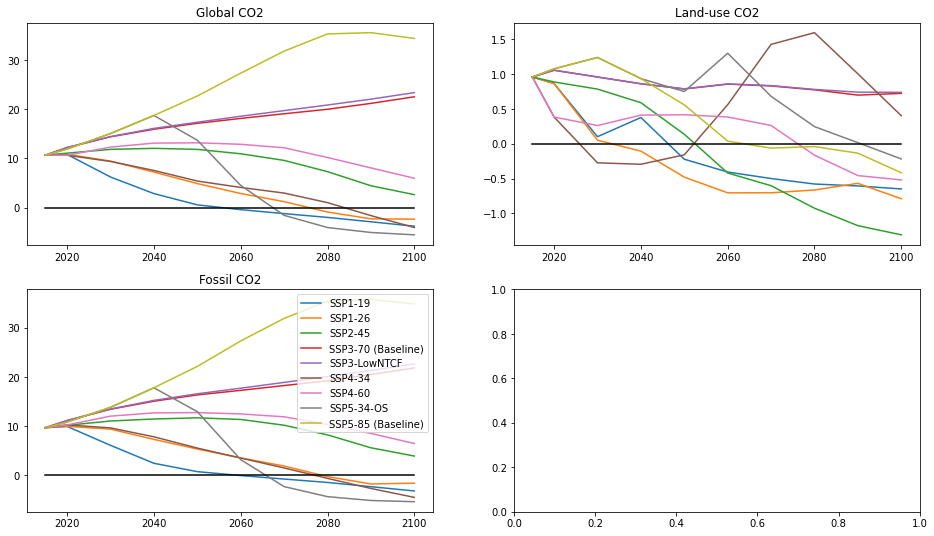

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2)

for i in range(len(scenarios)):
    ax[0,0].plot(SSP_years, co2_data[i,:], label=scenarios[i])
    ax[0,1].plot(SSP_years, land_use_co2_data[i,:], label=scenarios[i])
    ax[1,0].plot(SSP_years, fossil_co2_data[i,:], label=scenarios[i])

ax[0,0].title.set_text("Global CO2")
ax[0,1].title.set_text("Land-use CO2")
ax[1,0].title.set_text("Fossil CO2")
    
ax[0,0].plot(SSP_years, np.zeros(np.shape(SSP_years)), color='k')
ax[0,1].plot(SSP_years, np.zeros(np.shape(SSP_years)), color='k')
ax[1,0].plot(SSP_years, np.zeros(np.shape(SSP_years)), color='k')
ax[1,0].legend()

## Meinshausen et al. 2020 definition for extensions to 2500
"In summary, the extension principles are as follows:
- From 2100 onwards, net negative fossil CO2 emissions are brought back to zero during the 22nd century, while positive fossil CO2 emissions are ramped down to zero by 2250.
- Land use CO2 emissions are brought back to zero by 2150.
- Non-CO2 fossil greenhouse gas emissions are ramped down to zero by 2250.
- Land-use-related non-CO2 emissions are held constant at 2100 levels.

... For all scenarios with net negative fossil fuel extensions, we implemented extensions assuming constant emissions until 2140 (as suggested) but reaching zero emissions in 2190. The only exception is the SSP5-3.4-OS scenario, which was ramped back to zero by a slightly earlier date (2170) so that fossil and land use emissions (in combination with MAGICC7.0's default setting – see Sect. 2.4) met the design criteria of an approximate merge with SSP1-2.6 concentrations in the longer-term, i.e. after 2150."

## Implement Meinshausen et al. extensions

In [7]:
# Years range from 2015 to 2500
SSP_years_ext = SSP_years + [2110 + idx*10 for idx in range(40)]

fossil_co2_ext = np.zeros((len(scenarios),len(SSP_years_ext)))
fossil_co2_fixed = np.zeros((len(scenarios),len(SSP_years_ext)))
land_use_co2_ext = np.zeros((len(scenarios),len(SSP_years_ext)))
total_co2_ext = np.zeros((len(scenarios),len(SSP_years_ext)))
total_co2_fixed = np.zeros((len(scenarios),len(SSP_years_ext)))

#Copy over initial part of SSP scenarios
for i in range(len(scenarios)):
    fossil_co2_ext[i,0:len(SSP_years)] = fossil_co2_data[i,:]
    fossil_co2_fixed[i,0:len(SSP_years)] = fossil_co2_data[i,:]
    land_use_co2_ext[i,0:len(SSP_years)] = land_use_co2_data[i,:]
    total_co2_ext[i,0:len(SSP_years)] = co2_data[i,:]
    total_co2_fixed[i,0:len(SSP_years)] = co2_data[i,:]

# For land-use all scenarios: "Land use CO2 emissions are brought back to zero by 2150."
for i in range(len(scenarios)):
    land_use_2100 = land_use_co2_ext[i,9] # 9 is index for 2100
    land_use_co2_ext[i,10:15] = [land_use_2100 * (4 - idx) / 5 for idx in range(5)] # 5 steps from 2110 to 2150, inclusive, dropping by 1/5 each time.

# For fossil fuel scenarios with positive CO2 emissions: "positive fossil CO2 emissions are ramped down to zero by 2250"
pos_scenarios = [2,3,4,6,8] # 'SSP2-45' 'SSP3-70 (Baseline)' 'SSP3-LowNTCF' 'SSP4-60' 'SSP5-85 (Baseline)'
for i in range(len(pos_scenarios)):
    j = pos_scenarios[i] # short index for scenario
    fossil_2100 = fossil_co2_ext[j,9] # 9 is index for 2100
    fossil_co2_ext[j,10:25] = [fossil_2100 * (14 - idx) / 15 for idx in range(15)] # 15 steps from 2110 to 2250, inclusive, dropping by 1/15 each time.
    fossil_co2_fixed[j,10:50] = fossil_2100

# For fossil fuel scenarios with negative CO2 (except SSP5-34-OS): "assuming constant emissions until 2140 (as suggested) but reaching zero emissions in 2190."
neg_scenarios = [0,1,5] # 'SSP1-19' 'SSP1-26' 'SSP4-34'
for i in range(len(neg_scenarios)):
    j = neg_scenarios[i] # short index for scenario
    fossil_2100 = fossil_co2_ext[j,9] # 9 is index for 2100
    fossil_co2_ext[j,10:14] = fossil_2100 # constant emissions until 2140 
    fossil_co2_ext[j,14:19] = [fossil_2100 * (4 - idx) / 5 for idx in range(5)] # 5 steps from 2150 to 2190, inclusive, dropping by 1/5 each time. 
    fossil_co2_fixed[j,10:50] = fossil_2100

# For SSP5-34-OS as other negative CO2 emission scenarios except: "ramped back to zero by a slightly earlier date (2170)"
fossil_co2_ext[7,10:14] = fossil_co2_ext[7,9] # constant emissions until 2140, scenarios[7] = SSP5-34-OS
fossil_co2_ext[7,14:17] = [fossil_co2_ext[7,9] * (2 - idx) / 3 for idx in range(3)] # 3 steps from 2150 to 2170, inclusive, dropping by 1/3 each time.
    
# Combine fossil and land-use CO2 emissions:
for i in range(len(scenarios)):
    total_co2_ext[i,:] = fossil_co2_ext[i,:] + land_use_co2_ext[i,:]
    total_co2_fixed[i,:] = fossil_co2_fixed[i,:] + land_use_co2_ext[i,:]
    

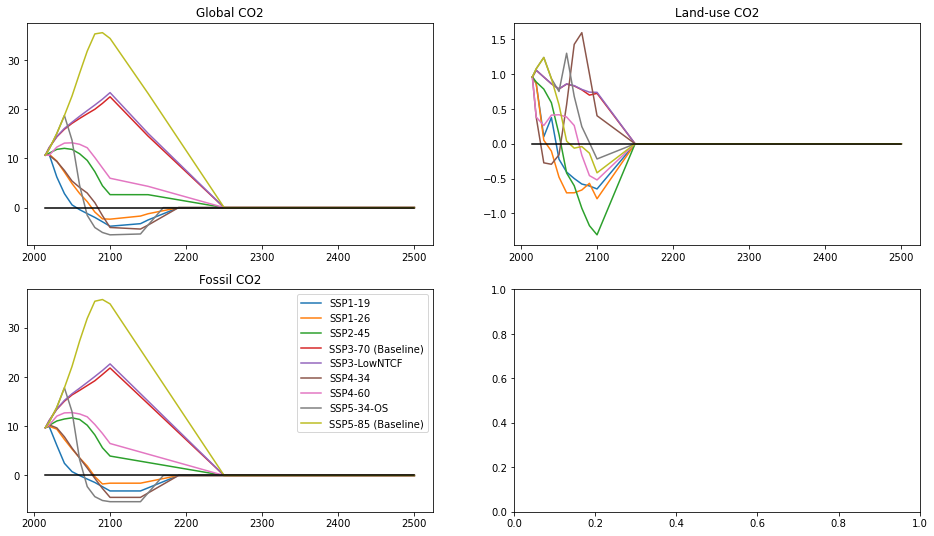

In [8]:
"""
Plot extensions
"""

fig, ax = plt.subplots(nrows=2, ncols=2)

for i in range(len(scenarios)):
    ax[0,0].plot(SSP_years_ext, total_co2_ext[i,:], label=scenarios[i])
    ax[0,1].plot(SSP_years_ext, land_use_co2_ext[i,:], label=scenarios[i])
    ax[1,0].plot(SSP_years_ext, fossil_co2_ext[i,:], label=scenarios[i])

ax[0,0].title.set_text("Global CO2")
ax[0,1].title.set_text("Land-use CO2")
ax[1,0].title.set_text("Fossil CO2")
    
ax[0,0].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[0,1].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[1,0].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[1,0].legend()

## Compare to Meinshausen et al. 2020. Figure 2 a, b, c - Looks good!
"The shared socio-economic pathway (SSP) greenhouse gas concentrations and their extensions to 2500": 
https://gmd.copernicus.org/articles/13/3571/2020/

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://gmd.copernicus.org/articles/13/3571/2020/gmd-13-3571-2020-f02-web.png")

# Plot Permanent 2100 fossil and negative emissions scenarios

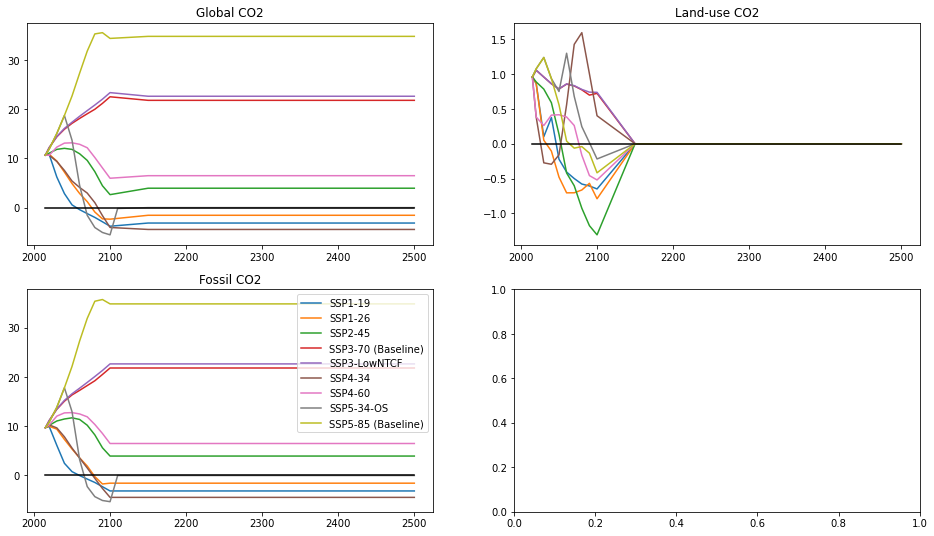

In [10]:
"""
Plot extensions
"""

fig, ax = plt.subplots(nrows=2, ncols=2)

for i in range(len(scenarios)):
    ax[0,0].plot(SSP_years_ext, total_co2_fixed[i,:], label=scenarios[i])
    ax[0,1].plot(SSP_years_ext, land_use_co2_ext[i,:], label=scenarios[i])
    ax[1,0].plot(SSP_years_ext, fossil_co2_fixed[i,:], label=scenarios[i])

ax[0,0].title.set_text("Global CO2")
ax[0,1].title.set_text("Land-use CO2")
ax[1,0].title.set_text("Fossil CO2")
    
ax[0,0].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[0,1].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[1,0].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[1,0].legend()

# Zero out core scenarios
SSP2-4.5 - adjusted to hit net zero emissions in 2100: 2190 total emissions halved, 2100 onwards zeroed.

SSP4-6.0 - adjusted to hit net zero emissions in 2120: 2110 is half 2100, 2120 onwards zeroed

All negative total emissions zeroed out from first negative decade.

SSP3-7.0 and SSP5-8.5 ignored.

In [11]:
total_co2_ext_zeroed = np.copy(total_co2_ext)

# SSP2-4.5 [index 2] - adjusted to hit net zero emissions in 2110: 2090 has 2/3 of 2090, 2100 has 1/3 of 2100, 2110 onwards zeroed.
total_co2_ext_zeroed[2,8] = (2/3)*total_co2_ext[2,7]
total_co2_ext_zeroed[2,9] = (1/3)*total_co2_ext[2,7]
total_co2_ext_zeroed[2,10:] = 0.0

# SSP4-6.0 [index 6] - adjusted to hit net zero emissions in 2130: 2110 has 2/3 of 2100, 2120 has 1/3 of 2100, 2130 onwards zeroed.
total_co2_ext_zeroed[6,10] = (2/3)*total_co2_ext[6,9]
total_co2_ext_zeroed[6,11] = (1/3)*total_co2_ext[6,9]
total_co2_ext_zeroed[6,12:] = 0.0

# Negative CO2 scenarios - zero out from first negative decade
total_co2_ext_zeroed[total_co2_ext_zeroed < 0.0] = 0.0


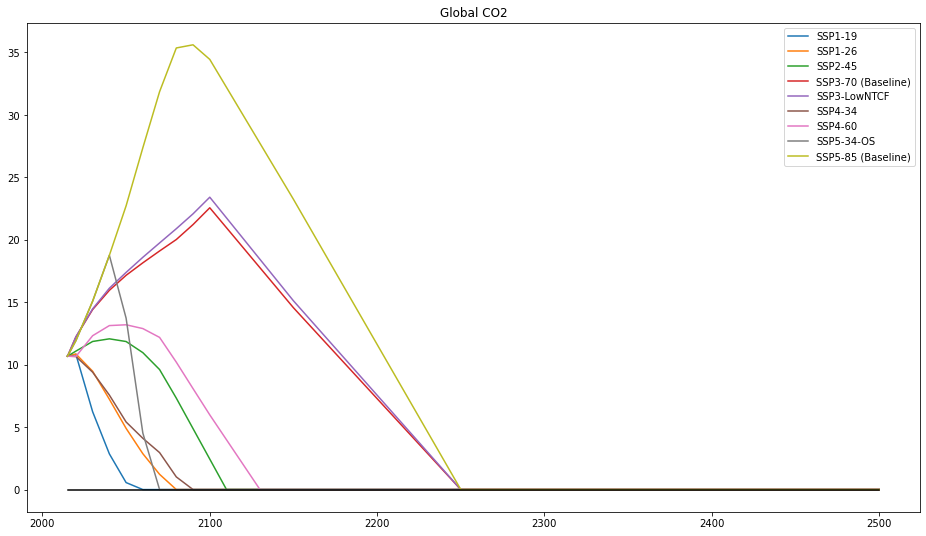

In [12]:
"""
Plot zeroed extensions
"""

fig, ax = plt.subplots(nrows=1, ncols=1)

for i in range(len(scenarios)):
    ax.plot(SSP_years_ext, total_co2_ext_zeroed[i,:], label=scenarios[i])

ax.title.set_text("Global CO2")
    
ax.plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax.legend()

## Thoughts on zeroed out results

SSP2-4.5 and SSP4-6.0 emissions drop precipitously but OK. --> could zero over 3 decades?

all negative emissioins scenarios look OK except for SSP1-1.9 which flattens out, and perhaps SSP4-3.4 which also flattens out a bit. --> move to annual / 5-yearly definition?

## decadal CDR anomaly code

In [13]:
def get_CDR_anom(CDR_peak_GtC,ramp_up,steady,ramp_down):
    # CDR_peak_GtC - number of GtC at peak
    # ramp_up - number of time indices to peak
    # steady - number of time indices at peak
    # ramp_down - number of time indices off peak
    # should work for both decadal and yearly definitions.
    length = ramp_up + steady + ramp_down
    CDR_anom = np.zeros(length)
    CDR_anom[0:ramp_up] = [(idx * CDR_peak_GtC)/ramp_up for idx in range(ramp_up)]
    CDR_anom[ramp_up : ramp_up + steady] = CDR_peak_GtC
    CDR_anom[ramp_up + steady : length] = [((ramp_up -1 -idx) * CDR_peak_GtC)/ramp_up for idx in range(ramp_up)]
    return CDR_anom

## Define the CDR anomaly scenarios

All scenarios include the CDR anomalies with 30 year ramp up, 70 year plateau, 30 year ramp down

In [14]:
for i in range(len(scenarios)):
    scenario_data = total_co2_ext_zeroed[i,:]
    index_last_pos = np.where(scenario_data>0.0)[0][-1]
    print(scenarios[i], SSP_years_ext[index_last_pos])

SSP1-19 2050
SSP1-26 2070
SSP2-45 2100
SSP3-70 (Baseline) 2240
SSP3-LowNTCF 2240
SSP4-34 2080
SSP4-60 2120
SSP5-34-OS 2060
SSP5-85 (Baseline) 2240


In [15]:
total_co2_ext_cdr2_373 = np.copy(total_co2_ext_zeroed)
total_co2_ext_cdr4_373 = np.copy(total_co2_ext_zeroed)
total_co2_ext_cdr6_373 = np.copy(total_co2_ext_zeroed)

cdr_scenarios = [total_co2_ext_cdr2_373, total_co2_ext_cdr4_373, total_co2_ext_cdr6_373]
cdr_magnitudes = [-2,-4,-6]
cdr_ramp_steady_ramp = [3,7,3] # ramp up, steady, ramp down

for i in range(len(scenarios)):
    scenario_data = total_co2_ext_zeroed[i,:]
    index_last_pos = np.where(scenario_data>0.0)[0][-1] # calculate index of last positive CO2 emissions
    print(scenarios[i], SSP_years_ext[index_last_pos])
    for j in range(len(cdr_scenarios)): # loop over all CDR scenarios
        cdr_anom = get_CDR_anom(cdr_magnitudes[j],*cdr_ramp_steady_ramp) # get CDR scenario
        idx_start = index_last_pos+1 # start after last positive index
        idx_end = index_last_pos+1+len(cdr_anom) # end after all elements of CDR anom entered.
        cdr_scenarios[j][i,idx_start:idx_end] = cdr_anom
        
#         cdr_scenarios[j][i,]

SSP1-19 2050
SSP1-26 2070
SSP2-45 2100
SSP3-70 (Baseline) 2240
SSP3-LowNTCF 2240
SSP4-34 2080
SSP4-60 2120
SSP5-34-OS 2060
SSP5-85 (Baseline) 2240


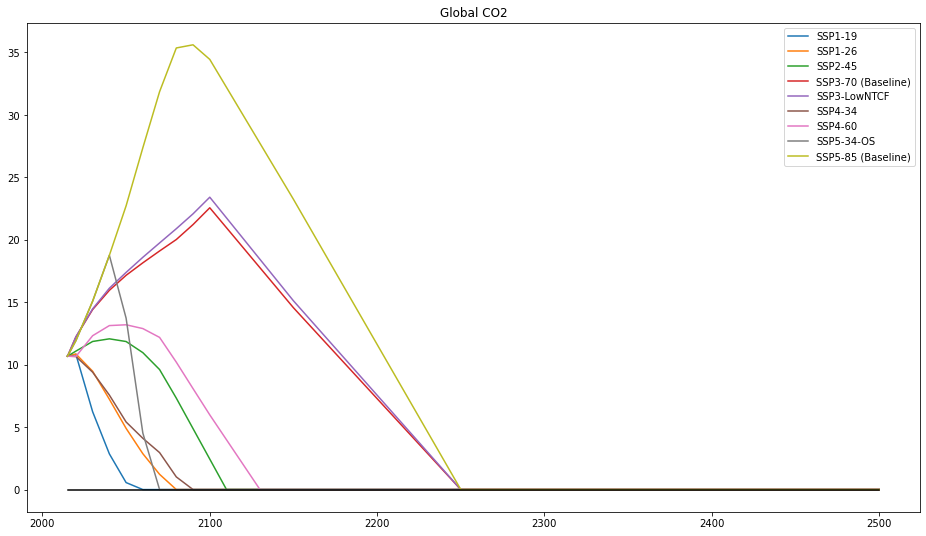

In [16]:
"""
Plot zeroed extensions
"""

fig, ax = plt.subplots(nrows=1, ncols=1)

for i in range(len(scenarios)):
    ax.plot(SSP_years_ext, total_co2_ext_zeroed[i,:], label=scenarios[i])

ax.title.set_text("Global CO2")
    
ax.plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax.legend()

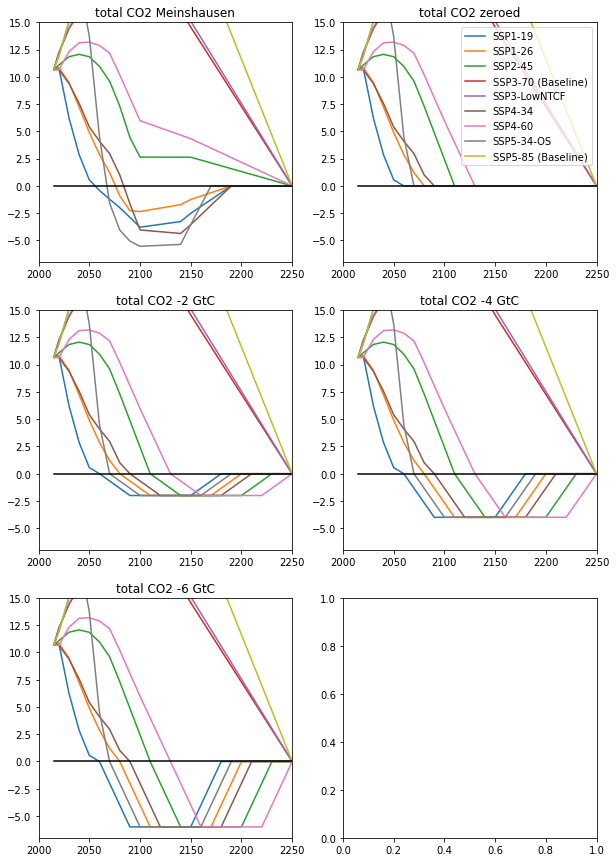

In [17]:
"""
Plot extensions
"""

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

for i in range(len(scenarios)):
    ax[0,0].plot(SSP_years_ext, total_co2_ext[i,:], label=scenarios[i])
    ax[0,1].plot(SSP_years_ext, total_co2_ext_zeroed[i,:], label=scenarios[i])
    ax[1,0].plot(SSP_years_ext, total_co2_ext_cdr2_373[i,:], label=scenarios[i])
    ax[1,1].plot(SSP_years_ext, total_co2_ext_cdr4_373[i,:], label=scenarios[i])
    ax[2,0].plot(SSP_years_ext, total_co2_ext_cdr6_373[i,:], label=scenarios[i])

ax[0,0].title.set_text("total CO2 Meinshausen")   
ax[0,1].title.set_text("total CO2 zeroed")
ax[1,0].title.set_text("total CO2 -2 GtC")
ax[1,1].title.set_text("total CO2 -4 GtC")
ax[2,0].title.set_text("total CO2 -6 GtC")

ax[0,0].set_xlim([2000, 2250])
ax[0,1].set_xlim([2000, 2250])
ax[1,0].set_xlim([2000, 2250])
ax[1,1].set_xlim([2000, 2250])
ax[2,0].set_xlim([2000, 2250])

ax[0,0].set_ylim([-7, 15])
ax[0,1].set_ylim([-7, 15])
ax[1,0].set_ylim([-7, 15])
ax[1,1].set_ylim([-7, 15])
ax[2,0].set_ylim([-7, 15])

ax[0,0].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[0,1].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[1,0].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[1,1].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[2,0].plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')
ax[0,1].legend(loc=1)

plt.savefig('foo.png')

In [18]:
#colors extracted from here: https://twitter.com/NPRougier/status/1323575342204936192/photo/1
ORANGE0 = '#FFF4E6'
ORANGE1 = '#FFE8CC'
ORANGE2 = '#FFD8A8'
ORANGE3 = '#FFC078'
ORANGE4 = '#FFA94D'
ORANGE5 = '#FF922B'
ORANGE6 = '#FD7E14'
ORANGE7 = '#F76707'
ORANGE8 = '#E85900'
ORANGE9 = '#D9480F'
YELLOW0 = '#FFF9DB'
YELLOW1 = '#FFF3BF'
YELLOW2 = '#FFEC99'
YELLOW3 = '#FFE066'
YELLOW4 = '#FFD43B'
YELLOW5 = '#FCC419'
YELLOW6 = '#FAB005'
YELLOW7 = '#F59F00'
YELLOW8 = '#F08000'
YELLOW9 = '#E67700'
LIME0 = '#F4FCE3'
LIME1 = '#E9FAC8'
LIME2 = '#D8F5A2'
LIME3 = '#COEB75'
LIME4 = '#A9E34B'
LIME5 = '#94D82D'
LIME6 = '#82C91E'
LIME7 = '#743816'
LIME8 = '#66A80F'
LIME9 = '#5C940D'
GREEN0 = '#EBFBEE'
GREEN1 = '#D3F9D8'
GREEN2 = '#B2F2BB'
GREEN3 = '#8CE99A'
GREEN4 = '#69DB7C'
GREEN5 = '#51CF66'
GREEN6 = '#40C057'
GREEN7 = '#37B24D'
GREEN8 = '#2F9E44'
GREEN9 = '#2B8A3E'
TEAL0 = '#E6FCF5'
TEAL1 = '#C3FAE8'
TEAL2 = '#96F2D7'
TEAL3 = '#63E6BE'
TEAL4 = '#38D9A9'
TEAL5 = '#20C997'
TEAL6 = '#12B886'
TEAL7 = '#OCA678'
TEAL8 = '#099268'
TEAL9 = '#087F5B'
CYANO = '#E3FAFC'
CYAN1 = '#C5F6FA'
CYAN2 = '#99E9F2'
CYAN3 = '#66D9E8'
CYAN4 = '#3BC9DB'
CYAN5 = '#22B8CF'
CYAN6 = '#15AABF'
CYAN7 = '#1098AD'
CYAN8 = '#0C8599'
CYAN9 = '#0B7285'
BLUE0 = '#E7F5FF'
BLUE1 = '#DOEBFF'
BLUE2 = '#A5D8FF'
BLUE3 = '#74COFC'
BLUE4 = '#4DABF7'
BLUE5 = '#339AFO'
BLUE6 = '#228BE6'
BLUE7 = '#1C7EDO'
BLUE8 = '#1971C2'
BLUE9 = '#1864AB'
INDIGO0 = '#EDF2FF'
INDIGO1 = '#DBE4FF'
INDIGO2 = '#BACOFF'
INDIGO3 = '#91A7EF'
INDIGO4 = '#748FFC'
INDIGO5 = '#5C7CFA'
INDIGO6 = '#4C6EF5'
INDIGO7 = '#4263EB'
INDIGO8 = '#3B5BDB'
INDIGO9 = '#364FC7'
VIOLET0 = '#F3FOFF'
VIOLET1 = '#E5DBFF'
VIOLET2 = '#DOBFFF'
VIOLET3 = '#B197FC'
VIOLET4 = '#9775FA'
VIOLET5 = '#845EF7'
VIOLET6 = '#7950F2'
VIOLET7 = '#7048E8'
VIOLET8 = '#674109'
VIOLET9 = '#5F3DC4'
GRAPE0 = '#F8FOFC'
GRAPE1 = '#F3D9FA'
GRAPE2 = '#EEBEFA'
GRAPE3 = '#E599F7'
GRAPE4 = '#DA77F2'
GRAPE5 = '#CC5DE8'
GRAPE6 = '#BE4BDB'
GRAPE7 = '#AEЗEC9' #fails, misinterpreted as RGBA
GRAPE8 = '#9C36B5'
GRAPE9 = '#862E9C'
PINKO = '#FFF0F6'
PINK1 = '#FFDEEB'
PINK2 = '#FCC2D7'
PINK3 = '#FAA2C1'
PINK4 = '#F783AC'
PINK5 = '#F06595'
PINK6 = '#E64980'
PINK7 = '#D6336C'
PINK8 = '#C2255C'
PINK9 = '#A61E4D'
RED0 = '#FFF5F5'
RED1 = '#FFЕЗЕЗ'
RED2 = '#FFC9C9'
RED3 = '#FFA8A8'
RED4 = '#FF8787'
RED5 = '#FF6B6B'
RED6 = '#FA5252'
RED7 = '#FОЗЕЗЕ' #fails, misinterpreted as RGBA
RED8 = '#E03131'
RED9 = '#C92A2A'
GRAY0 = '#F8F9FA'
GRAY1 = '#F1F3F5'
GRAY2 = '#E9ECEF'
GRAY3 = '#DEE2E6'
GRAY4 = '#CED4DA'
GRAY5 = '#ADB5BD'
GRAY6 = '#868E96'
GRAY7 = '#495057'
GRAY8 = '#343A40'
GRAY9 = '#212529'

IEA data from Pielke's paper:
https://osf.io/preprints/socarxiv/m4fdu
https://github.com/mattgburgess/climatekaya/blob/master/Pielke-et-al-2021-files/Tables-for-figs12s1-s3/P-B-R%202021%20-%20Figure%201-2-S1-S2%20data.xlsx



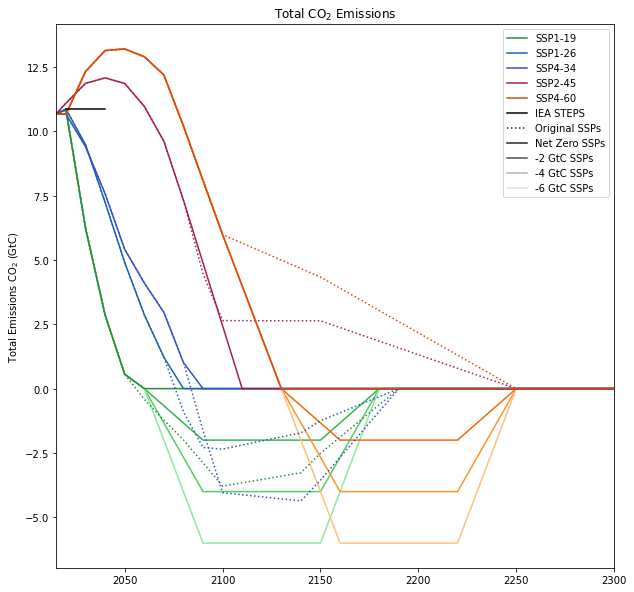

In [31]:
"""
Figure for comment. Plot extensions vs. our extensions
"""

# match scenario colors with other figure.
scenario_color = {'SSP1-19':GREEN9,
                  'SSP1-26':BLUE9,
                  'SSP4-34':INDIGO9,
                  'SSP2-45':PINK9,
                  'SSP4-60':ORANGE9,}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

# SSP1-1.9 CDR scenarios
index = np.where(scenarios == 'SSP1-19')
ax.plot(SSP_years_ext, total_co2_ext_cdr2_373[index,:].flatten(), color=GREEN7)
ax.plot(SSP_years_ext, total_co2_ext_cdr4_373[index,:].flatten(), color=GREEN5)
ax.plot(SSP_years_ext, total_co2_ext_cdr6_373[index,:].flatten(), color=GREEN3)

# SSP4-6.0 CDR scenarios
index = np.where(scenarios == 'SSP4-60')
ax.plot(SSP_years_ext, total_co2_ext_cdr2_373[index,:].flatten(), color=ORANGE7)
ax.plot(SSP_years_ext, total_co2_ext_cdr4_373[index,:].flatten(), color=ORANGE5)
ax.plot(SSP_years_ext, total_co2_ext_cdr6_373[index,:].flatten(), color=ORANGE3)

# zero line
# ax.plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')

# loop over all plot scenarios, plot original and modified
for scenario in scenario_color.keys():
    
    # find index of this scenario:
    index = np.where(scenarios == scenario)
    
    # plot original SSP
    ax.plot(SSP_years_ext, total_co2_ext[index,:].flatten(), color=scenario_color[scenario], linestyle='dotted')
    # plot zeroed SSP
    ax.plot(SSP_years_ext, total_co2_ext_zeroed[index,:].flatten(), color=scenario_color[scenario], label=scenario)

"""
rough approx to IEA stated emissions policy scenario
"""
    
index_245 = np.where(scenarios == 'SSP2-45')
index_460 = np.where(scenarios == 'SSP4-60')
em_2020 = 0.5 * (total_co2_ext[index_245,1] + total_co2_ext[index_460,1]).flatten()
    
ax.plot([2020,2040],[em_2020,em_2020], color='k', label='IEA STEPS')

ax.title.set_text("Total CO$_2$ Emissions")   

ax.set_xlim([2015, 2300])

ax.set_ylabel('Total Emissions CO$_2$ (GtC)')

handles, labels = ax.get_legend_handles_labels()

orig_SSPs_line = mlines.Line2D([], [], color=GRAY9, linestyle='dotted', label='Original SSPs')
GRAY9_line = mlines.Line2D([], [], color=GRAY9, label='Net Zero SSPs')
GRAY7_line = mlines.Line2D([], [], color=GRAY7, label='-2 GtC SSPs')
GRAY5_line = mlines.Line2D([], [], color=GRAY5, label='-4 GtC SSPs')
GRAY3_line = mlines.Line2D([], [], color=GRAY3, label='-6 GtC SSPs')

handles.extend([orig_SSPs_line, GRAY9_line, GRAY7_line, GRAY5_line, GRAY3_line]) 

ax.legend(handles=handles, loc=1)

# plt.savefig('foo.png')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


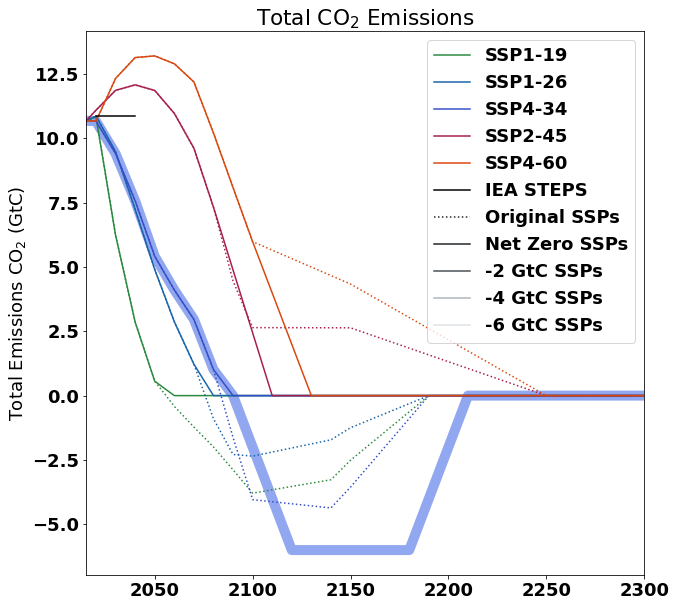

In [37]:
"""
Figure for comment. Plot extensions vs. our extensions
"""
# import matplotlib
# font = {'size'   : 18}

# matplotlib.rc('font', **font)

# match scenario colors with other figure.
scenario_color = {'SSP1-19':GREEN9,
                  'SSP1-26':BLUE9,
                  'SSP4-34':INDIGO9,
                  'SSP2-45':PINK9,
                  'SSP4-60':ORANGE9,}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

# SSP4-3.4 CDR scenarios
index = np.where(scenarios == 'SSP4-34')
# ax.plot(SSP_years_ext, total_co2_ext_cdr2_373[index,:].flatten(), color=INDIGO7)
# ax.plot(SSP_years_ext, total_co2_ext_cdr4_373[index,:].flatten(), color=INDIGO5)
ax.plot(SSP_years_ext, total_co2_ext_cdr6_373[index,:].flatten(), color=INDIGO3, linewidth=10)

# zero line
# ax.plot(SSP_years_ext, np.zeros(np.shape(SSP_years_ext)), color='k')

# loop over all plot scenarios, plot original and modified
for scenario in scenario_color.keys():
    
    # find index of this scenario:
    index = np.where(scenarios == scenario)
    
    # plot original SSP
    ax.plot(SSP_years_ext, total_co2_ext[index,:].flatten(), color=scenario_color[scenario], linestyle='dotted')
    # plot zeroed SSP
    ax.plot(SSP_years_ext, total_co2_ext_zeroed[index,:].flatten(), color=scenario_color[scenario], label=scenario)

"""
rough approx to IEA stated emissions policy scenario
"""
    
index_245 = np.where(scenarios == 'SSP2-45')
index_460 = np.where(scenarios == 'SSP4-60')
em_2020 = 0.5 * (total_co2_ext[index_245,1] + total_co2_ext[index_460,1]).flatten()
    
ax.plot([2020,2040],[em_2020,em_2020], color='k', label='IEA STEPS')

ax.title.set_text("Total CO$_2$ Emissions")   

ax.set_xlim([2015, 2300])

ax.set_ylabel('Total Emissions CO$_2$ (GtC)')

handles, labels = ax.get_legend_handles_labels()

orig_SSPs_line = mlines.Line2D([], [], color=GRAY9, linestyle='dotted', label='Original SSPs')
GRAY9_line = mlines.Line2D([], [], color=GRAY9, label='Net Zero SSPs')
GRAY7_line = mlines.Line2D([], [], color=GRAY7, label='-2 GtC SSPs')
GRAY5_line = mlines.Line2D([], [], color=GRAY5, label='-4 GtC SSPs')
GRAY3_line = mlines.Line2D([], [], color=GRAY3, label='-6 GtC SSPs')

handles.extend([orig_SSPs_line, GRAY9_line, GRAY7_line, GRAY5_line, GRAY3_line]) 

ax.legend(handles=handles, loc=1)

plt.savefig('foo.png')

In [21]:
index = np.where(scenarios == 'SSP2-45')

for i in range(10):
    print(SSP_years_ext[i], total_co2_ext[index,i] / total_co2_ext[index,1])
    
index = np.where(scenarios == 'SSP4-34')

for i in range(10):
    print(SSP_years_ext[i], total_co2_ext[index,i] / total_co2_ext[index,1])

2015 [[0.9631276]]
2020 [[1.]]
2030 [[1.06958683]]
2040 [[1.08869838]]
2050 [[1.06924554]]
2060 [[0.98890351]]
2070 [[0.86685301]]
2080 [[0.66027071]]
2090 [[0.40160845]]
2100 [[0.23821518]]
2015 [[1.00195532]]
2020 [[1.]]
2030 [[0.88184609]]
2040 [[0.70987006]]
2050 [[0.50769286]]
2060 [[0.38529277]]
2070 [[0.27780857]]
2080 [[0.09506218]]
2090 [[-0.15250609]]
2100 [[-0.37917966]]


## Export scenarios to CSV format.

In [22]:
# Make a list of years from 2015 to 2500
years_list = [SSP_years_ext[0] + idx for idx in range((SSP_years_ext[-1] + 1 - SSP_years_ext[0]))]

# List of scenarios to include in csv file.
scenario_list = [0,1,2,5,6] # 'SSP1-19', 'SSP1-26', 'SSP2-45', 'SSP4-34', 'SSP4-60'

# The list of previously generated scenarios to include
perturb_list = [total_co2_ext_zeroed, total_co2_ext_cdr2_373, total_co2_ext_cdr4_373, total_co2_ext_cdr6_373]
perturb_names = ['_zeroed','_2GtC_373','_4GtC_373','_6GtC_373']

# Dictionary to store scenario names / data to import to pandas.
scenario_dict = {}
scenario_dict['years'] = years_list

# Loop through scenarios and perturbations, interpolate and then store in scenario_dict.
for i in scenario_list:
    
    # save unperturbed CO2 emisssion data, interpolated to yearly basis.
    scenario_dict[scenarios[i]] = np.interp(years_list, SSP_years_ext, total_co2_ext[i,:])
    
    for j in range(len(perturb_list)):
        
        anomaly = perturb_list[j][i,:] - total_co2_ext[i,:]
        scenario_dict[scenarios[i]+perturb_names[j]] = np.interp(years_list, SSP_years_ext, anomaly)

# import dictionary to dataframe
scenario_df = pd.DataFrame.from_dict(scenario_dict)
# export dataframe to csv.
scenario_df.to_csv('SSP_scenario_CDR_anomalies.csv')


# Export fixed 2100 scenarios to CSV format

In [23]:
# Make a list of years from 2015 to 2500
years_list = [SSP_years_ext[0] + idx for idx in range((SSP_years_ext[-1] + 1 - SSP_years_ext[0]))]

# List of scenarios to include in csv file.
scenario_list = [0,1,2,5,6] # 'SSP1-19', 'SSP1-26', 'SSP2-45', 'SSP4-34', 'SSP4-60'

# total_co2_ext_cdr2_373 = np.copy(total_co2_fixed)

# # The list of previously generated scenarios to include
# perturb_list = [total_co2_ext_zeroed, total_co2_ext_cdr2_373, total_co2_ext_cdr4_373, total_co2_ext_cdr6_373]
# perturb_names = ['_zeroed','_2GtC_373','_4GtC_373','_6GtC_373']

# Dictionary to store scenario names / data to import to pandas.
scenario_dict = {}
scenario_dict['years'] = years_list

# Loop through scenarios and perturbations, interpolate and then store in scenario_dict.
for i in scenario_list:
    
    # save unperturbed CO2 emisssion data, interpolated to yearly basis.
    scenario_dict[scenarios[i]] = np.interp(years_list, SSP_years_ext, total_co2_fixed[i,:])

# import dictionary to dataframe
scenario_df = pd.DataFrame.from_dict(scenario_dict)
# export dataframe to csv.
scenario_df.to_csv('SSP_scenario_fixed_2100_CDR.csv')

# FIN